In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

 # Consider the Google Stock Prediction dataset

In [2]:
df=pd.read_csv("GOOG.csv")
df.drop(["symbol"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 127.9+ KB


In [3]:
df["date"]=pd.to_datetime(df["date"])
df=df.set_index("date")

In [4]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

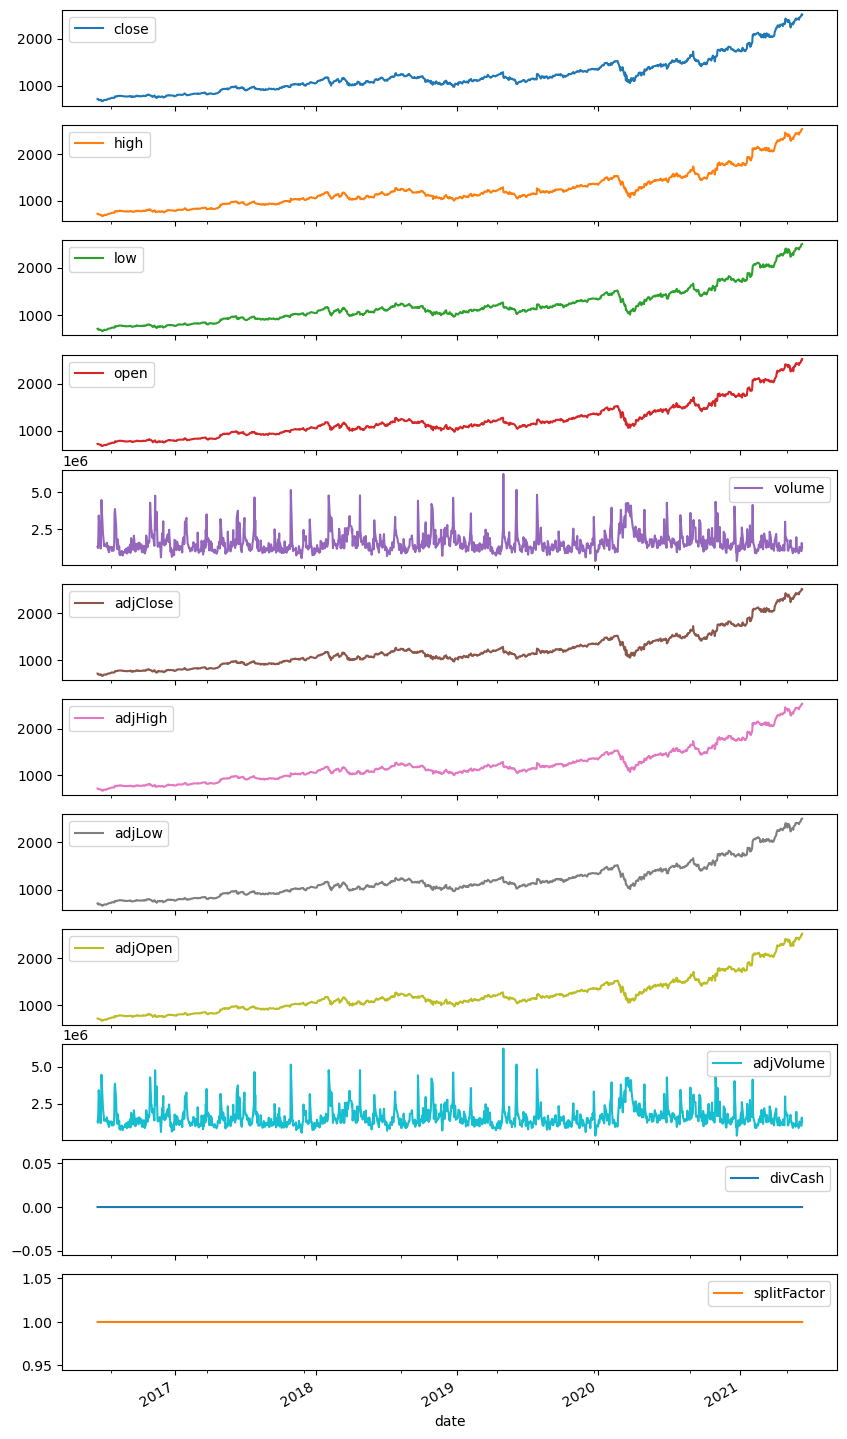

In [5]:
df.plot(subplots=True,figsize=(10,20))

In [674]:
train_df=df[df.index<"2020-01-01"]
test_df=df[df.index>"2020-01-01"]

In [675]:
type(train_df)

pandas.core.frame.DataFrame

In [676]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
train_df=m.fit_transform(train_df)
test_df=m.fit_transform(train_df)

In [677]:
train_df=np.array(train_df)
test_df=np.array(train_df)

In [678]:
type(train_df)

numpy.ndarray

In [679]:
from tensorflow.keras.layers import Dense, Input ,SimpleRNN,Dropout

# IMP PAY ATTENTION

In [680]:
# VVIMP (The x_train still contains the close column)
x_train=[]
y_train=[]
for i in range(20, len(train_df)):
    x_train.append(train_df[i-20:i])
    y_train.append(train_df[i, df.columns.get_loc("close")])

In [681]:
x_test=[]
y_test=[]
for i in range(20, len(test_df)):
    x_test.append(test_df[i-20:i])
    y_test.append(test_df[i, df.columns.get_loc("close")])

In [683]:
from sklearn.preprocessing import MinMaxScaler
x_train=np.array(x_train)
y_train=np.array(y_train)
type(x_train)

numpy.ndarray

In [684]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [685]:
y_test

array([0.07031216, 0.07604162, 0.07445411, 0.09455773, 0.09914708,
       0.10525176, 0.1015572 , 0.10748871, 0.10320244, 0.10125413,
       0.10608881, 0.11206362, 0.14508378, 0.15098642, 0.14837425,
       0.15141938, 0.14915357, 0.1644658 , 0.16380194, 0.16740991,
       0.16801605, 0.16826139, 0.16590899, 0.16478331, 0.1571344 ,
       0.16113204, 0.15765395, 0.15465212, 0.14993289, 0.14983187,
       0.14631049, 0.14597855, 0.14616617, 0.14993289, 0.14551673,
       0.14257263, 0.14506935, 0.14893709, 0.16137738, 0.16176704,
       0.1545078 , 0.13190746, 0.14541571, 0.13195076, 0.13599169,
       0.14937005, 0.14521366, 0.14062432, 0.14886493, 0.15580667,
       0.17166732, 0.17121993, 0.15290586, 0.16560592, 0.1635133 ,
       0.15406041, 0.15735088, 0.1505246 , 0.15610974, 0.15616747,
       0.15673031, 0.15416144, 0.16983447, 0.16569251, 0.1701231 ,
       0.15864975, 0.15914044, 0.1612042 , 0.18328499, 0.19237708,
       0.18575284, 0.18921649, 0.20904591, 0.20119496, 0.18878

In [686]:
x_train.shape

(874, 20, 12)

In [687]:
y_train.shape

(874,)

In [688]:
rnn1 = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(20, 12)),
    Dropout(0.2),
    SimpleRNN(50, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50),
    Dense(1)  
])

C:\Users\godof\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [689]:
rnn = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(20, 12)),

    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(1)  
])

In [690]:
rnn.compile(optimizer='adam', loss='mse',metrics=["mae"])
rnn1.compile(optimizer='adam', loss='mse',metrics=["mae"])


In [691]:
rnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.3789 - mae: 0.3760
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - mae: 0.0659
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - mae: 0.0493
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mae: 0.0411
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mae: 0.0367
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - mae: 0.0326 
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mae: 0.0437 
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mae: 0.0365
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mae: 0.0317
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - mae: 0.0348
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - mae: 0.0316
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - mae: 0.0292
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

In [692]:
rnn1.fit(x_train,y_train,epochs=20)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.5096 - mae: 0.5626
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0982 - mae: 0.2517
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0469 - mae: 0.1719
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0431 - mae: 0.1605
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0306 - mae: 0.1370
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231 - mae: 0.1143
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0199 - mae: 0.1127
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0159 - mae: 0.0994
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0164 - mae: 0.1016
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - mae: 0.0897
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0134 - mae: 0.0933
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mae: 0.0879
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━

In [693]:
rnn1.evaluate(x_test,y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - mae: 0.0402     


[0.0031341665890067816, 0.04627722129225731]

In [694]:
rnn.evaluate(x_test,y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.7166e-04 - mae: 0.0216  


[0.0009374035871587694, 0.02328176610171795]

In [695]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [696]:
print(mean_absolute_percentage_error(y_test,rnn.predict(x_test)))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
0.0593559074875097


In [697]:
print(mean_squared_error(y_test,rnn.predict(x_test)))


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.0009374027405194691


It's important to consider both the MSE and MAPE together to get a complete picture of the model's performance. In this case, the high MAPE indicates that the model's predictions are not accurate on a percentage basis, despite the low MSE.

In [706]:
y_pred_test=rnn.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [708]:
y_pred_test.shape

(874, 1)

In [709]:
y_test.shape


(874,)

In [714]:
df[df.index<"2020-01-01"].filter("close")

TypeError: Index(...) must be called with a collection of some kind, 'close' was passed